In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from IPython.display import display
# %matplotlib widget

In [3]:
def plot_matrix(matrix):
    fig = plt.figure()
    splt = fig.add_subplot(111, projection="3d")
    
    ny = matrix.shape[0]
    nx = matrix.shape[1]
    
    xpos = np.array([i for i in range(nx)]*ny)
    ypos = np.array([[i]*nx for i in range(ny)])
    ypos = ypos.ravel()
    zpos = np.zeros(nx*ny)
    
    dx = np.ones(nx*ny)
    dy = np.ones(nx*ny)
    dz = matrix.ravel()
    
    splt.bar3d(ypos, xpos, zpos, dx, dy, dz, color="grey")
    plt.show()

(100, 100)


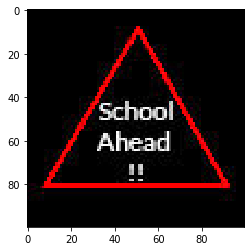

In [4]:
stop_img = Image.open('Signs/school.jpg')
stop_arr = np.array(stop_img)
plt.imshow(stop_arr)
print(stop_arr.shape[:-1])

In [5]:
stop_gry = np.zeros(shape=stop_arr.shape[:-1])
stop_gry = 0.3*stop_arr[:,:,0]+0.59*stop_arr[:,:,1]+0.11*stop_arr[:,:,2]

In [6]:
stop_gry1 = (stop_gry>35)*(np.ones(shape=stop_gry.shape)*255)
img_gry = Image.fromarray(stop_gry1.astype('uint8'))
# img_gry.save("stop.png")
# img_gry.show()

In [7]:
def detect_object(img_matrix):
    nx = img_matrix.shape[1]
    ny = img_matrix.shape[0]
    
    img_matrix_copy = np.copy(img_matrix)
    
    max_top = ny
    max_bottom = 0
    max_left = nx
    max_right = 0
    
    for i in range(1, ny-1):
        
        hit = False
        for j in range(1, nx-1):
            
            if(not hit):
                if(img_matrix[i+1][j] or img_matrix[i][j+1] or img_matrix[i-1][j] or img_matrix[i][j-1]):
                    if(not img_matrix[i][j]):
                        img_matrix_copy[i][j] = 65
                        hit = True
                        if(img_matrix[i+1][j]):
                            max_top = i if(i<max_top) else max_top
                        if(img_matrix[i][j+1]):
                            max_left = j if(j<max_left) else max_left
                        if(img_matrix[i][j-1]):
                            max_right = j if(j>max_right) else max_right
                        if(img_matrix[i-1][j]):
                            max_bottom = i if(i>max_bottom) else max_bottom
            else:
                if(not img_matrix[i][j]):
                    img_matrix_copy[i][j] = 65
                    if(img_matrix[i+1][j]):
                        max_top = i if(i<max_top) else max_top
                    if(img_matrix[i][j+1]):
                        max_left = j if(j<max_left) else max_left
                    if(img_matrix[i][j-1]):
                        max_right = j if(j>max_right) else max_right
                    if(img_matrix[i-1][j]):
                        max_bottom = i if(i>max_bottom) else max_bottom
                    hit = False
                    
    for i in range(max_top, max_bottom):
        img_matrix_copy[i][max_left] = 90
        img_matrix_copy[i][max_right] = 90
    for j in range(max_left, max_right):
        img_matrix_copy[max_top][j] = 90
        img_matrix_copy[max_bottom][j] = 90
        
    
    container = np.zeros(3)
    for i in range(max_top, max_bottom):
        for j in range(max_left, max_right):
            container += stop_arr[i][j]
    new_img = Image.fromarray(img_matrix_copy.astype('uint8'))
    display(stop_img)
    display(new_img)
#     new_img.show()
    return container

In [8]:
db_arr = np.array([
    [214363, 77584, 80037], 
    [312336, 237540, 242010], 
    [307594, 232794, 237236], 
    [544232, 78318, 79161]
])
db_keys = {0:"school", 1:"speed limit 10", 2:"speed limit 30", 3:"stop"}
def check_db(cont):
    error = []
    for i in range(db_arr.shape[0]):
        error.append(np.sum(np.abs(db_arr[i]-cont)))
    print(error)
    return db_keys[np.where(error == np.amin(error))[0][0]]

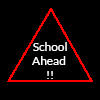

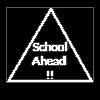

[0.0, 419902.0, 405640.0, 331479.0]
school


In [9]:

cont = detect_object(stop_gry1)
print(check_db(cont))
# print(cont)